<a href="https://colab.research.google.com/github/InGev007/startup_acd/blob/main/Lesson%2062/Lesson_62.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Напишіть код для визначення границь та кутів у зображенні за допомогою фільтра Собеля.

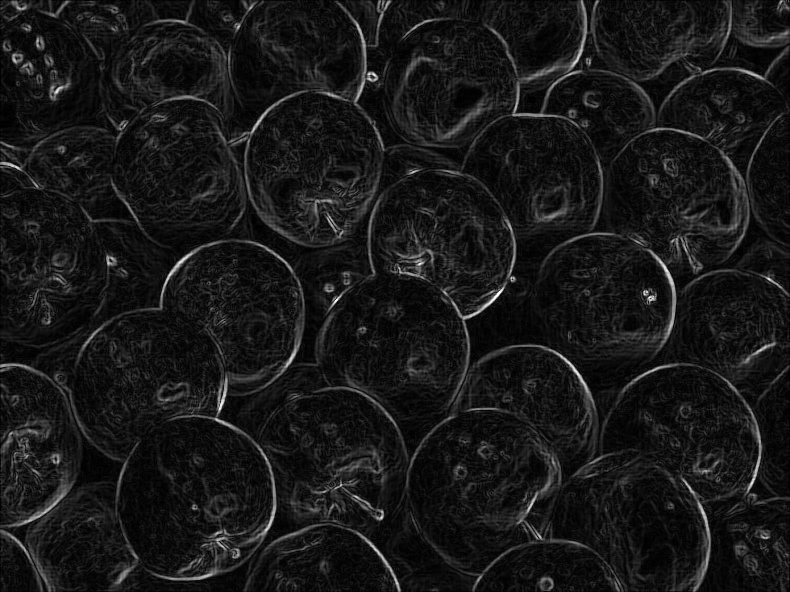

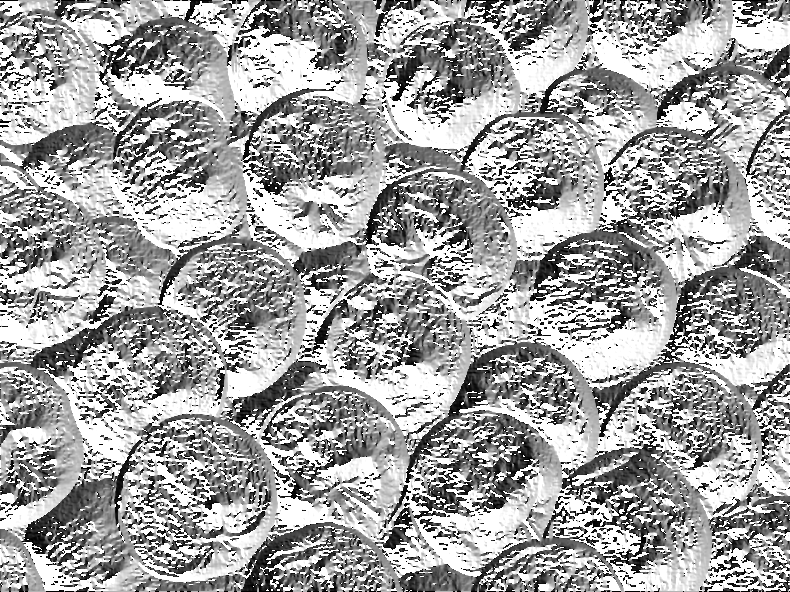

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Завантаження зображення та його перетворення в чорно-біле
img = cv2.imread('aidared.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Визначення границь за допомогою фільтра Собеля
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=3)

# Об'єднання градієнтів за допомогою модуля та визначення їх напрямків
abs_sobelx = cv2.convertScaleAbs(sobelx)
abs_sobely = cv2.convertScaleAbs(sobely)
grad = cv2.addWeighted(abs_sobelx, 0.5, abs_sobely, 0.5, 0)
angle = cv2.phase(sobelx, sobely, angleInDegrees=True)

# Відображення результату
cv2_imshow(grad)
cv2_imshow(angle)



## 2. Використовуючи метод густини градієнта (HOG), напишіть код для витягування ознак з зображення.

<ipython-input-5-d748a8ce2df4>:9: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features, hog_image = hog(gray, orientations=8, pixels_per_cell=(16, 16),
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


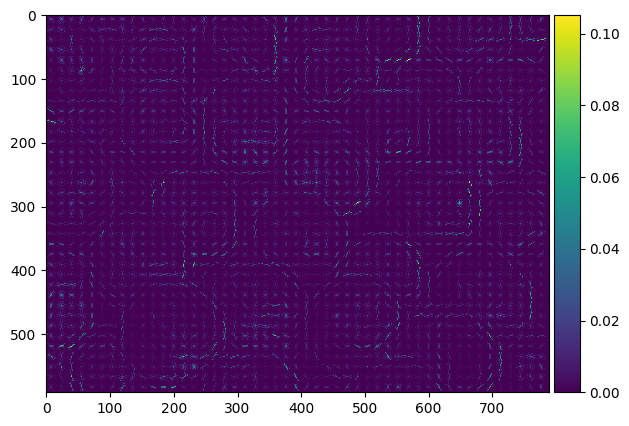

In [5]:
from skimage.feature import hog
from skimage import io, color

# Завантаження зображення та його перетворення в чорно-біле
img = io.imread('aidared.jpg')
gray = color.rgb2gray(img)

# Визначення ознак HOG
hog_features, hog_image = hog(gray, orientations=8, pixels_per_cell=(16, 16),
                              cells_per_block=(1, 1), visualize=True, multichannel=False)

# Відображення результату
io.imshow(hog_image)
io.show()


## 3. Завантажте датасет CIFAR-10 та використайте HOG для витягування ознак зображень. Застосуйте будь-який простий класифікатор (наприклад SVM) для класифікації зображень та обчисліть метрики точності, такі як accuracy, precision, recall та F1-score

In [13]:
import tensorflow as tf

# Завантаження датасету
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [7]:
from skimage.feature import hog

# Витягнення ознак HOG для тренувальної вибірки
hog_features_train = []
for i in range(len(x_train)):
    hog_features_train.append(hog(x_train[i], orientations=8, pixels_per_cell=(16, 16),
                              cells_per_block=(1, 1), multichannel=True))

# Витягнення ознак HOG для тестової вибірки
hog_features_test = []
for i in range(len(x_test)):
    hog_features_test.append(hog(x_test[i], orientations=8, pixels_per_cell=(16, 16),
                             cells_per_block=(1, 1), multichannel=True))


<ipython-input-7-7cce1bc31e99>:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features_train.append(hog(x_train[i], orientations=8, pixels_per_cell=(16, 16),
<ipython-input-7-7cce1bc31e99>:12: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features_test.append(hog(x_test[i], orientations=8, pixels_per_cell=(16, 16),


In [8]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Навчання класифікатора SVM
clf = svm.SVC()
clf.fit(hog_features_train, y_train.ravel())

# Прогнозування міток класів для тестової вибірки
y_pred = clf.predict(hog_features_test)

# Обчислення метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.3966
Precision: 0.39503176713011223
Recall: 0.39659999999999995
F1-score: 0.38795147076335335


## 4. Використайте метод SIFT для витягування ознак з зображень та порівняйте його з методом HOG за допомогою метрик точності.

In [16]:
import cv2
from sklearn.cluster import KMeans
from sklearn.svm import SVC
import numpy as np
from keras.datasets import cifar10
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

sift = cv2.SIFT_create()  # Викроситання SIFT
descriptors = []

# Отримання дескрипторів для всіх зображень у наборі даних
for i in np.arange(x_train.shape[0]):
    _, imgDesc = sift.detectAndCompute(x_train[i], None)
    if imgDesc is not None:
        for j in np.arange(imgDesc.shape[0]):
            descriptors.append(imgDesc[j])

descriptors = np.array(descriptors)

kmeans = KMeans(n_clusters=10).fit(descriptors)

train_hist_X = []
train_hist_Y = []

for i in np.arange(x_train.shape[0]):
    _, imgDesc = sift.detectAndCompute(x_train[i], None)
    if imgDesc is not None:
        kcent = kmeans.predict(imgDesc)
        hist, _ = np.histogram(kcent, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], normed=True)
        train_hist_X.append(hist)
        train_hist_Y.append(y_train[i])

train_hist_X = np.array(train_hist_X).reshape((-1, 10))
train_hist_Y = np.array(train_hist_Y).reshape((-1,))

# Train SVM

modSVM = SVC()
modSVM.fit(train_hist_X, train_hist_Y.reshape((-1,)))

conf_matrix_test = np.zeros((10, 10))

preds = []
labels = []
for i in np.arange(x_test.shape[0]):
    _, imgDesc = sift.detectAndCompute(x_test[i], None)
    if imgDesc is not None:
        kcent = kmeans.predict(imgDesc)
        hist, _ = np.histogram(kcent, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], normed=True)
        ret = modSVM.predict(hist.reshape((1, -1)))[0]
        preds.append(ret)
        labels.append(y_test[i, 0])
        real = y_test[i, 0]
        conf_matrix_test[real, ret] = conf_matrix_test[real, ret] + 1

print("accuracy is {0}".format(accuracy_score(labels, preds)))

accuracy is 0.21902566158781075
